# Seaborn stands on shoulders of Matplotlib

- You can (and often want) to use Matplotlib
- Firs, let's import Matplotlib library - comes preinstalled on Kaggle

In [1]:
import matplotlib.pyplot as plt

- Let's plot some lines

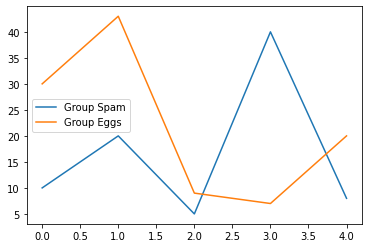

In [2]:
def plot_some_lines():
    plt.figure()
    x1 = [10,20,5,40,8]
    x2 = [30,43,9,7,20]
    plt.plot(x1, label="Group Spam")
    plt.plot(x2, label="Group Eggs")
    plt.legend()
    plt.show()

plot_some_lines()

- Doesn't look too bad. But let's try out Seaborn

In [3]:
import seaborn as sns

- Seaborn can take over from Matplotlib very easily.

In [4]:
sns.set()

- Seaborn has taken control of the figure's aesthetics.
- Now show the matplotlib plots again with Seaborn in charge.

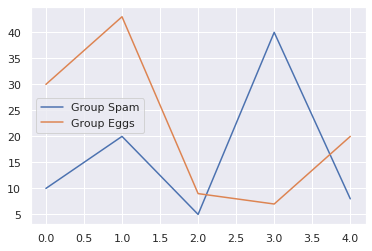

In [5]:
plot_some_lines()

## Seaborn has some very handy data sets built in

In [6]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

- And we can use them just like a dataframe that came from a CSV

In [7]:
mpg_df = sns.load_dataset("mpg")
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Seaborn has many types of easy to use plots

- Look how easy it is to render a "count plot"

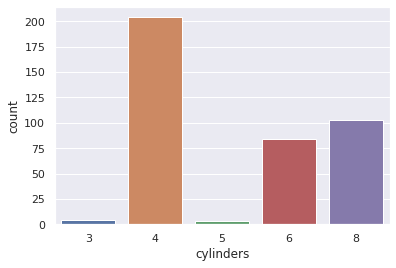

In [8]:
countplot = sns.countplot(data=mpg_df, x="cylinders")

## Let's Check Some Assumptions


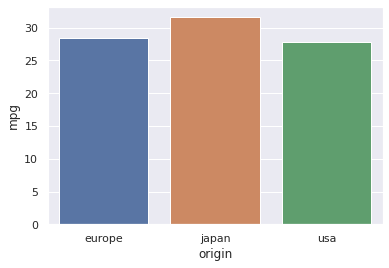

In [9]:
four_cylinders = mpg_df[ mpg_df.cylinders == 4 ]
by_origin = four_cylinders.groupby("origin", as_index=False)
mpg_by_origin = by_origin.mpg.mean()
barplot = sns.barplot(x="origin", y="mpg", data=mpg_by_origin)

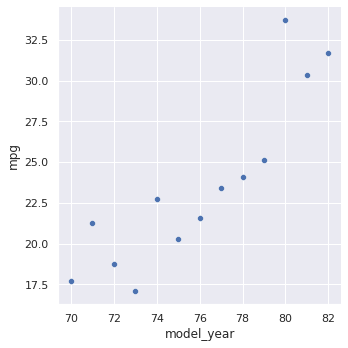

In [10]:
avg_mpg = mpg_df.groupby("model_year", as_index=False).mpg.mean()
relplot = sns.relplot(x="model_year", y="mpg", data=avg_mpg)

## Enough of cars, let's take to the skies

In [11]:
flights = sns.load_dataset("flights")
flights.tail()

,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


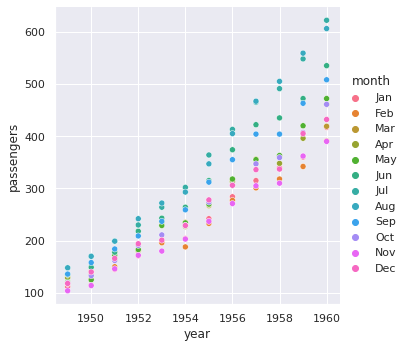

In [12]:
flights_plot = sns.relplot(x="year",y="passengers", data=flights, hue="month")

- Let's consolidate the data by combining months

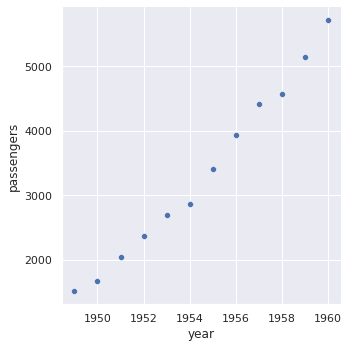

In [13]:
year_sums = flights.groupby("year", as_index=False).sum()
sums_plot = sns.relplot(x="year",y="passengers", data=year_sums)

- We can make some predictions, but let Seaborn handle the boilerplate Linear Model part.
- lmplot to the rescue

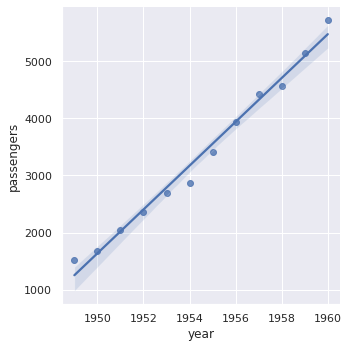

In [14]:
sums_lmplot = sns.lmplot(x="year",y="passengers",data=year_sums)

- Apparently more people are flying year over year (unless there's a pandemic)
- But do those visualizations best convey that notion? Or are there better choices available?
- How much work would it take to use another type of graph in Seaborn?
- Let's try a Bar Plot instead...

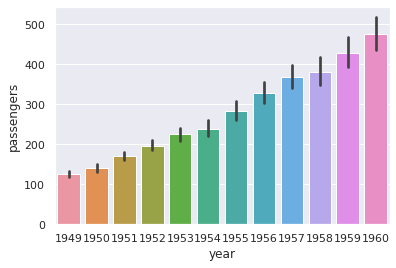

In [15]:
barplot = sns.barplot(x="year", y="passengers", data=flights)

- How hard is it to swap out month for year as the x variable?
  - Spoiler alert, not hard at all.

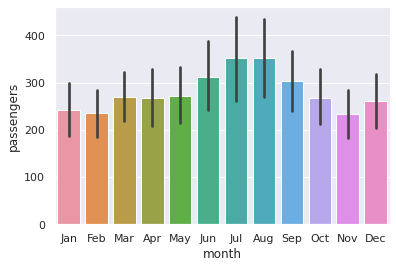

In [16]:
by_month = sns.barplot(x="month", y="passengers", data=flights)

- What are those black lines jutting out the top? That's called the confidence interval
- You can modify (or remove) them if you like

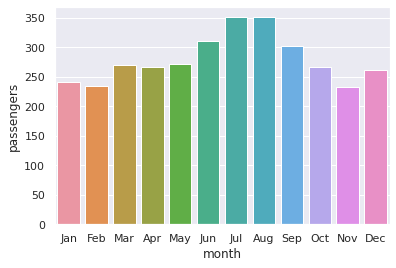

In [17]:
by_month_no_ci=sns.barplot(x="month",y="passengers", data=flights, ci=None)

## The Importance of Plotting Data

- Plotting data isn't just for good looks, seeing data visually can spot problems that are tougher spot with the raw data.
- The famous [Ancombe's Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) data set demonstrates this point.

In [18]:
anscombe = sns.load_dataset("anscombe")
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


- Anscombe's quartet comprises four data sets that have nearly identical simple descriptive statistics, yet have very different distributions and appear very different when graphed. 

In [19]:
from sklearn.linear_model import LinearRegression
datasets = ["I","II","III","IV"]

for dataset in datasets:
    print("Dataset", dataset)
    data=anscombe.query(f"dataset == '{dataset}'")

    am = LinearRegression().fit(data.x.values.reshape(-1,1), data.y.values)
    print(am.coef_)
    print(am.intercept_)

Dataset I
[0.50009091]
3.0000909090909094
Dataset II
[0.5]
3.00090909090909
Dataset III
[0.49972727]
3.002454545454545
Dataset IV
[0.49990909]
3.0017272727272726


- All 4 Datasets can be described in such a way that they seem quite similar. 
- Check how closely the numbers match across the data sets

## But how these similar seeming datasets look when visualized?

### Data Set 1

<AxesSubplot:xlabel='x', ylabel='y'>

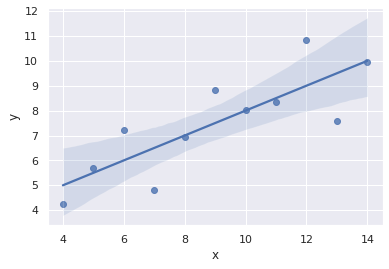

In [20]:
sns.regplot(x='x', y='y', data=anscombe.query("dataset == 'I'"))

### Data Set 2

<AxesSubplot:xlabel='x', ylabel='y'>

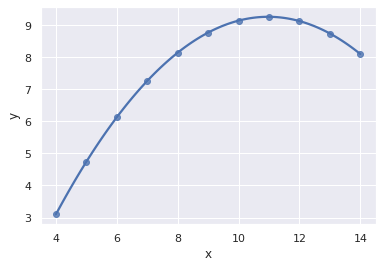

In [21]:
sns.regplot(x='x', y='y', data=anscombe.query("dataset == 'II'"), order=2)

### Data Set 3

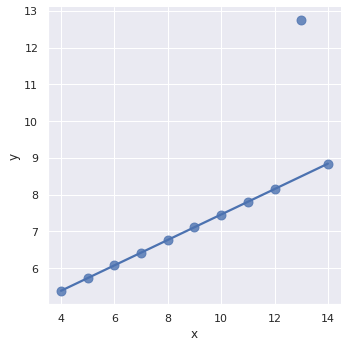

In [22]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80})

### Data Set 4

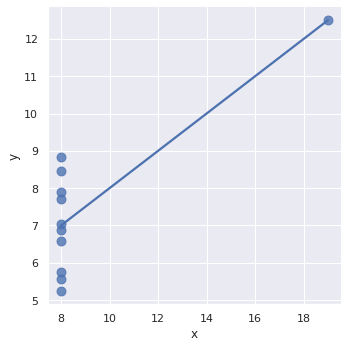

In [23]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'IV'"),ci=None, scatter_kws={"s": 80})

## In summary, ALWAYS plot your data